View the datebase

In [3]:
"""Download and unpack json file with filtered media from GDG database"""

import pandas as pd
import json
from datetime import datetime

data_for_analysis = pd.DataFrame()
with open('filtered_media.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data,  "changes", ["fetchdate_orig",	"fetchdate_check", "page_title", "title_new", "page_domain_root", "page_url", "num_changes", "perc_changedchars"], errors='ignore')
        data_for_analysis = pd.concat([data_for_analysis, df], sort = False, axis = 0)


In [4]:
"""Converting values in date columns to datetime format"""

data_for_analysis = data_for_analysis.reset_index().drop(columns = ['index'])

def change_time(dt):
  dt_new = dt.replace(' UTC', '')
  return datetime.strptime(dt_new, '%Y-%m-%d %H:%M:%S')

data_for_analysis['fetchdate_orig'] = data_for_analysis['fetchdate_orig'].apply(change_time)
data_for_analysis['fetchdate_check'] = data_for_analysis['fetchdate_check'].apply(change_time)

data_for_analysis

,from,to,from_range,to_range,fetchdate_orig,fetchdate_check,page_title,title_new,page_domain_root,page_url,num_changes,perc_changedchars
0,Ð¡Ð²ÐµÐ¶ÐµÐµ Ð¾ ÐºÐ¾Ð²Ð¸Ð´Ðµ: Ð²ÑÐµÐ´ ÑÐ°ÑÑ...,Свежее о ковиде: вред фастфуда для заразившихс...,0-23,0-21,2022-02-07 06:16:29,2022-02-08 06:17:32,Ð¡Ð²ÐµÐ¶ÐµÐµ Ð¾ ÐºÐ¾Ð²Ð¸Ð´Ðµ: Ð²ÑÐµÐ´ ÑÐ°ÑÑ...,Свежее о ковиде: вред фастфуда для заразившихс...,i38.ru,https://i38.ru/obschestvo-obichnie/svezhee-o-k...,NaN,NaN
1,Столичный бизнес сэкономил,Ефимов: московские предприниматели сэкономили ...,0-2,0-6,2022-02-07 06:17:33,2022-02-08 06:17:30,Столичный бизнес сэкономил почти 6 млрд рублей...,Ефимов: московские предприниматели сэкономили ...,m24.ru,https://www.m24.ru/news/ehkonomika/07022022/20...,NaN,NaN
2,благодаря льготной аренде – Ефимов,,7-11,11-11,2022-02-07 06:17:33,2022-02-08 06:17:30,Столичный бизнес сэкономил почти 6 млрд рублей...,Ефимов: московские предприниматели сэкономили ...,m24.ru,https://www.m24.ru/news/ehkonomika/07022022/20...,NaN,NaN
3,Выявили более 120 тыс. заболевших.,Коронавирусные ограничения смягчили.,0-4,0-2,2022-02-01 06:17:51,2022-02-08 06:18:17,Выявили более 120 тыс. заболевших. Актуальное ...,Коронавирусные ограничения смягчили. Актуально...,rbc.ru,https://www.rbc.ru/society/01/02/2022/5e2fe945...,NaN,NaN
4,1,7,9-9,7-7,2022-02-01 06:17:51,2022-02-08 06:18:17,Выявили более 120 тыс. заболевших. Актуальное ...,Коронавирусные ограничения смягчили. Актуально...,rbc.ru,https://www.rbc.ru/society/01/02/2022/5e2fe945...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
69588,| Политика | ИноСМИ,,11-14,11-11,2022-01-15 01:17:37,2022-01-22 01:18:00,Der Spiegel (Германия): «Мы готовы к любым вар...,Der Spiegel (Германия): «Мы готовы к любым вар...,inosmi.ru,https://inosmi.ru/politic/20220114/251299915.html,NaN,NaN
69589,| Политика | ИноСМИ,,11-14,11-11,2022-01-15 01:17:03,2022-01-22 01:18:02,EU Observer (Бельгия): Россия уже победила Евр...,EU Observer (Бельгия): Россия уже победила Евр...,inosmi.ru,https://inosmi.ru/politic/20220115/251304117.html,NaN,NaN
69590,| Политика | ИноСМИ,,11-14,11-11,2022-01-15 01:17:18,2022-01-22 01:18:29,"Fox News (США): Путин затевает свару, из котор...","Fox News (США): Путин затевает свару, из котор...",inosmi.ru,https://inosmi.ru/politic/20220115/251300925.html,NaN,NaN
69591,12-й,в,11-11,11-11,2022-01-21 00:31:42,2022-01-22 00:31:22,Международная молитва против антисемитизма и н...,Международная молитва против антисемитизма и н...,pronedra.ru,https://pronedra.ru/v-rossii-12-j-raz-prochita...,NaN,NaN


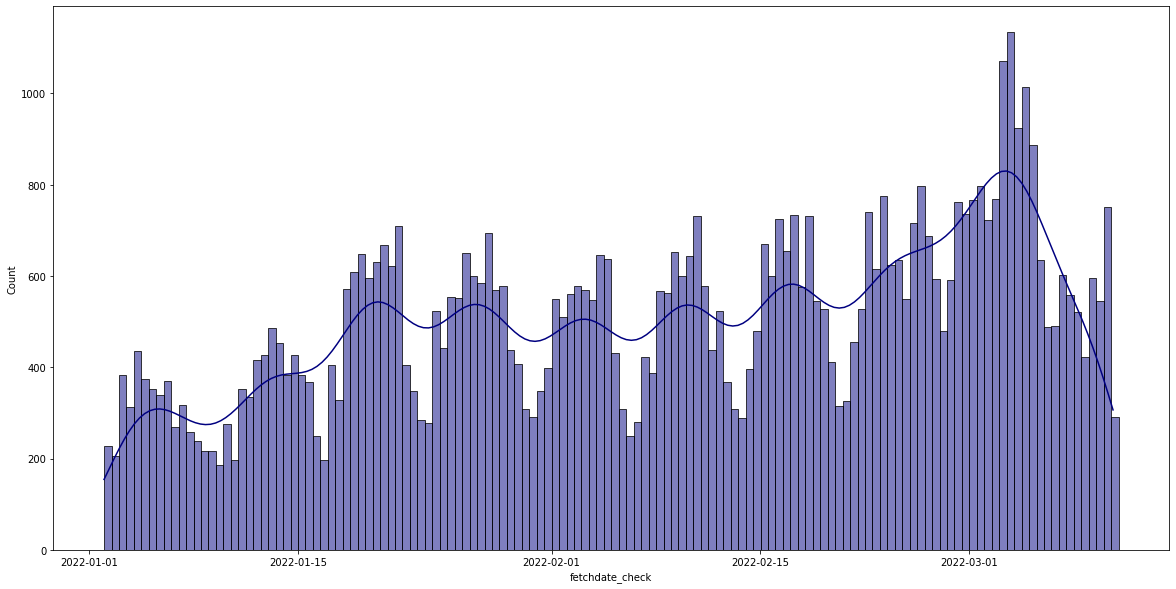

In [5]:
"""Visualize news distribution over time"""

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(data=data_for_analysis, x="fetchdate_check", color = 'navy',binwidth = 0.5, kde = True)
plt.show()



Working with wordclouds

In [265]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import pymorphy2
import pandas as pd
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import time
import os

In [273]:
"""Create the folder for images"""
os.mkdir("images")

In [266]:
"""Convert columns to datetime format"""
cloud = pd.DataFrame()
with open('filtered_media.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        cloud = pd.concat([cloud, df], sort = False, axis = 0)

cloud = cloud.reset_index().drop(columns = ['index'])

def change_time(dt):
  dt_new = dt.replace(' UTC', '')
  return datetime.strptime(dt_new, '%Y-%m-%d %H:%M:%S')

cloud['fetchdate_orig'] = cloud['fetchdate_orig'].apply(change_time)
cloud['fetchdate_check'] = cloud['fetchdate_check'].apply(change_time)

In [292]:
morph = pymorphy2.MorphAnalyzer()

"""Function to convert words to initial form"""
def normal_rus(w):
    global morph
    return morph.parse(w)[0].normal_form

In [313]:
"""Create list of stopwords"""
stopwords = ["и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его", 
"но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", 
"нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", 
"него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", 
"тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", 
"раз", "тоже", "себе", "под", "будет", "ж", "тогда", "кто", "этот", "того", "потому", "этого", "какой", "совсем", 
"ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", "сейчас", "были", "куда", "зачем", "всех", 
"никогда", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", 
"нас", "про", "всего", "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", 
"перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между", 'иза']

first_date = datetime.strptime("2022-01-01", "%Y-%m-%d") # start day to analyse and vizualise wordcloud
os.chdir("images") # change directory
csv = 'date, word, count\n' # structure for csv-file


"""Iterate over each day for a weekly period (total 100 days)"""

with open('wordscloud_for_viz.csv', 'w') as file:
    for day in tqdm(range(100), desc = 'Loading'):
        end_date = first_date + timedelta(days=7)
        cloud_week = cloud[(cloud['fetchdate_orig'] >= first_date) & (cloud['fetchdate_orig'] <= end_date)]
        text = " ".join(review for review in cloud_week.page_title)
        texts_lower_case = text.lower()
        only_words_text = re.sub('[^А-яЁёA-z]', ' ', texts_lower_case)
        texts_splitted = only_words_text.split()
        without_sw = [text for text in texts_splitted if text not in stopwords]
        c_dict = Counter()
        for w in without_sw:
            n = normal_rus(w)
            c_dict[n] += 1
        # generate and save wordclouds
        date_name = first_date.strftime("%Y-%m-%d")
        common = c_dict.most_common(100)
        if len(common) != 0:
            wordcloud = WordCloud(width=1600, height=800, max_font_size=150).generate_from_frequencies(dict(common))
            wordcloud.to_file(f"{date_name}.png")
            # save file
            for value in common:
                csv += (date_name + ', ' + value[0] + ', ' + str(value[1]) + '\n')
        first_date += timedelta(days=1)
        end_date = first_date + timedelta(days=7)
        
    file.write(csv)
os.chdir("..")


Loading: 100%|██████████| 105/105 [13:25<00:00,  7.67s/it]
